## TODO:
    LANCE-WILLIAMS-ALGORITHM

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

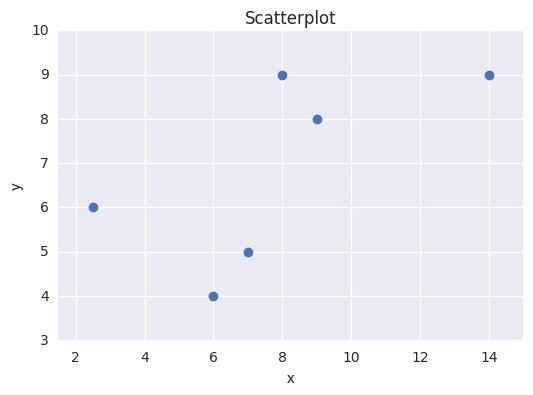

In [136]:
x = np.array([8,9,14,2.5,6,7])
y = np.array([9,8,9,6,4,5])

def plot_data():
    plt.plot(x,y, 'o')
    plt.ylim(min(y)-1, max(y)+1)
    plt.xlim(min(x)-1, max(x)+1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Scatterplot')
    plt.show()
    
plot_data()

In [125]:
X = np.vstack((x,y))
X

array([[  8. ,   9. ,  14. ,   2.5,   6. ,   7. ],
       [  9. ,   8. ,   9. ,   6. ,   4. ,   5. ]])

In [127]:
x_1, x_2, x_3, x_4, x_5, x_6 = X[:,3], X[:,4], X[:,5], X[:,0], X[:,1], X[:,2]
x_list = [x_1, x_2, x_3, x_4, x_5, x_6]
x_list

[array([ 2.5,  6. ]),
 array([ 6.,  4.]),
 array([ 7.,  5.]),
 array([ 8.,  9.]),
 array([ 9.,  8.]),
 array([ 14.,   9.])]

### Single Linkage

####    Distance measure for clusters $(C_k, C_l)$:

## $$d(C_k, C_l) = \min_{i\in C_k, j\in C_j} d(x_i, x_j) $$

    - Starting with each data point representing one cluster, 
    search for the two most nearest clusters and connect them.
    - Repeat until one cluster is left.

    Obviously first two merges consist of merging [6,4] with [7,5] 
    and [8,9] with [9,8]

    After this we have to compute the nearest distance to the 
    other data points

    With this dataset it's faster to do it manually by looking at
    the data points. For illustration the calculations though:

Distance between [6,4] and [7,5]
1.41421356237
Distance between [7,5] and [9,8]
3.60555127546
Distance between [2.5, 6] and [9,8]
6.80073525437
Distance between [9,8] and [14,9]
5.09901951359
Distance between [2.5, 6] and [7,5]
4.60977222865
Distance between [2.5, 6] and [6,4]
4.03112887415
Distance between [2.5, 6] and [8,9]
6.26498204307
Distance between [6,4] and [8,9]
5.38516480713


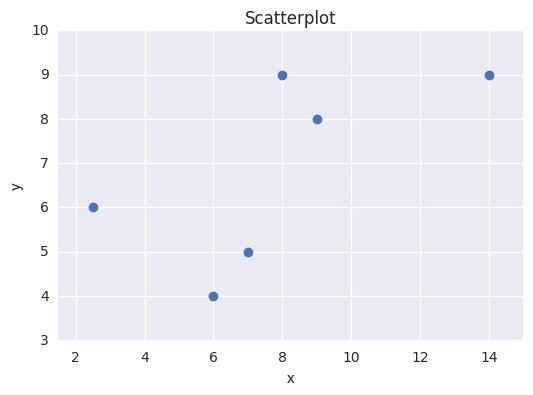

In [145]:
print('Distance between [6,4] and [7,5]')
print(np.linalg.norm(x_2-x_3)) 

print('Distance between [7,5] and [9,8]')
print(np.linalg.norm(x_3-x_5)) 

print('Distance between [2.5, 6] and [9,8]')
print(np.linalg.norm(x_1 - x_5))

print('Distance between [9,8] and [14,9]')
print(np.linalg.norm(x_5 - x_6))

print('Distance between [2.5, 6] and [7,5]')
print(np.linalg.norm(x_1-x_3))

print('Distance between [2.5, 6] and [6,4]')
print(np.linalg.norm(x_1-x_2))

print('Distance between [2.5, 6] and [8,9]')
print(np.linalg.norm(x_1-x_4))

print('Distance between [6,4] and [8,9]')
print(np.linalg.norm(x_2 - x_4))

plot_data()

In [144]:
x_2, x_4

(array([ 6.,  4.]), array([ 8.,  9.]))

### Complete linkage

## $$ d(C_k, C_l) = \max_{i\in C_k, j\in C_l} d(x_i, x_j)$$   

    Again start with C1 = (x_2, x_3) and C2 = (x_4,x_5) 
    We've done all the calculations already above, 
    so the next cluster should be formed by merging C1 and x_1 (=C3). 
    The 4th cluster by merging C3 and C2. And lastly merging C4 and x_6.

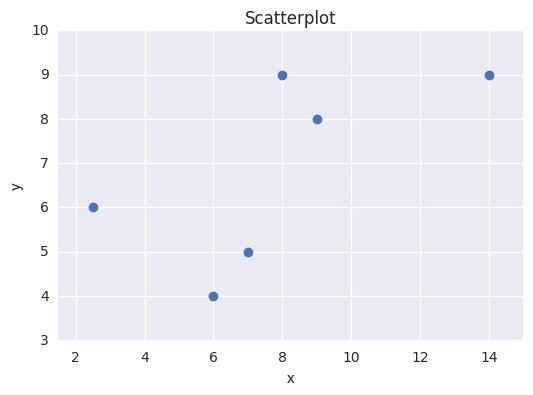

In [147]:
plot_data()

### Centroid linkage

## $$d(C_k, C_l) = d( \bar{x}_k, \bar{x}_l)$$
    with
    
## $$\bar{x}_p = \frac{1}{|C_p|}\sum_{i\in C_p}x_i$$
   

### Creating C1 and C2

Resulting clusters C1 and C2:  [ 6.5  4.5] [ 8.5  8.5]


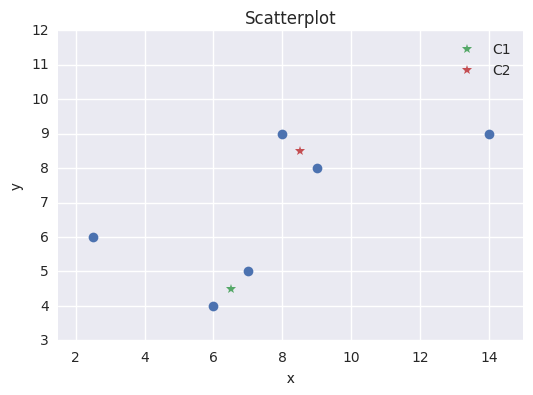

In [161]:
c1 = np.mean([x_2, x_3], axis=0)
c2 = np.mean([x_4, x_5], axis=0)
print("Resulting clusters C1 and C2: ", c1, c2)

plt.plot(x,y, 'o')
plt.plot(c1[0], c1[1], '*', markersize=7, label="C1")
plt.plot(c2[0], c2[1], '*', markersize=7, label = 'C2')
plt.ylim(min(y)-1, max(y)+3)
plt.xlim(min(x)-1, max(x)+1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot')
plt.legend()
plt.show()

In [151]:
print("Distance C1 and C2: ", np.linalg.norm(c1-c2))
print("Distance C1 and x1: ", np.linalg.norm(c1 - x_1))
print("Distance C2 and x6: ", np.linalg.norm(c2 - x_6))

Distance C1 and C2:  4.472135955
Distance C1 and x1:  4.27200187266
Distance C2 and x6:  5.52268050859


    Next merge: C1 and x1

### Clustering C1 and x1



Resulting centroid C3:  [ 4.5   5.25]


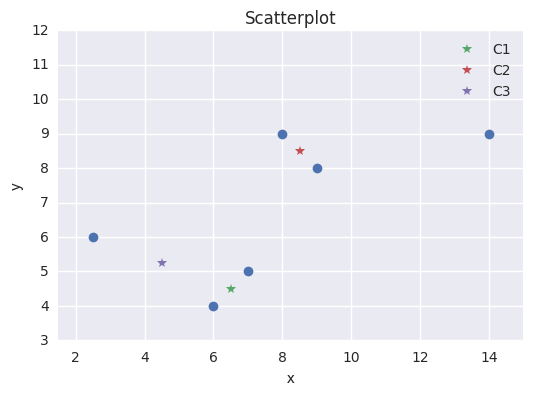

In [156]:
c3 = np.mean([c1, x_1], axis=0)
print('Resulting centroid C3: ', c3)

plt.plot(x,y, 'o')

plt.plot(c1[0], c1[1], '*', markersize=7, label="C1")
plt.plot(c2[0], c2[1], '*', markersize=7, label = 'C2')
plt.plot(c3[0], c3[1], '*', markersize=7, label = 'C3')
plt.ylim(min(y)-1, max(y)+3)
plt.xlim(min(x)-1, max(x)+1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot')
plt.legend()
plt.show()

In [158]:
print("Distance C2 and C3: ", np.linalg.norm(c3-c2))
print("Distance C3 and x6: ", np.linalg.norm(c2 - x_6))

Distance C2 and C3:  5.15388203202
Distance C3 and x6:  5.52268050859


Resulting centroid C4:  [ 6.5    6.875]


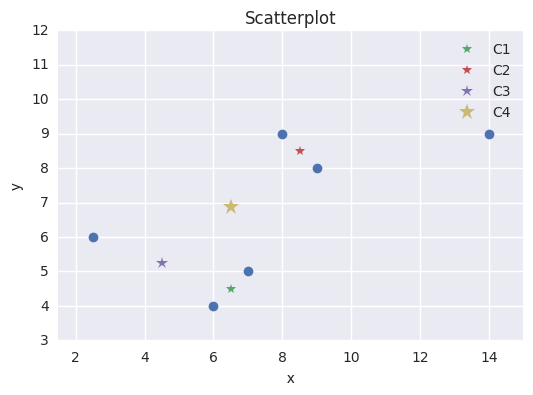

In [159]:
c4 = np.mean([c3, c2], axis=0)
print('Resulting centroid C4: ', c4)

plt.plot(x,y, 'o')

plt.plot(c1[0], c1[1], '*', markersize=7, label="C1")
plt.plot(c2[0], c2[1], '*', markersize=7, label = 'C2')
plt.plot(c3[0], c3[1], '*', markersize=9, label = 'C3')
plt.plot(c4[0], c4[1], '*', markersize=12, label = 'C4')
plt.ylim(min(y)-1, max(y)+3)
plt.xlim(min(x)-1, max(x)+1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot')
plt.legend()
plt.show()

### Clustering all data points

Resulting centroid:  [ 7.75        6.83333333]


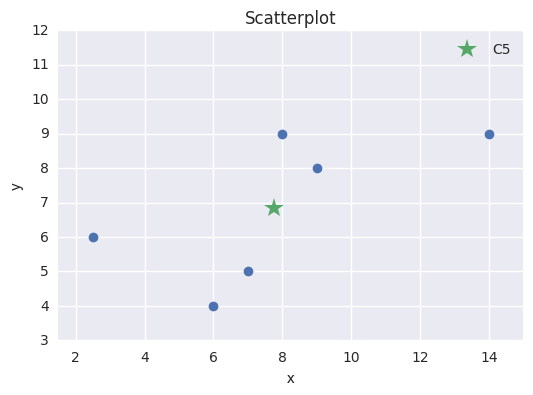

In [160]:
cluster = np.mean([X[:,i] for i in range(len(x))], axis=0)
print('Resulting centroid: ', cluster)

plt.plot(x,y, 'o')
plt.plot(cluster[0], cluster[1], '*', markersize=15, label = 'C5')
plt.ylim(min(y)-1, max(y)+3)
plt.xlim(min(x)-1, max(x)+1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot')
plt.legend()
plt.show()